# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [2]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [3]:
df_main = pd.read_excel("Raisin_Dataset.xlsx")
df = df_main.copy()
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


## Exploratory Data Analysis and Visualization

<AxesSubplot:xlabel='Class', ylabel='count'>

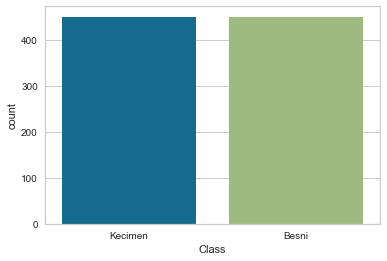

In [6]:
sns.countplot(df["Class"])

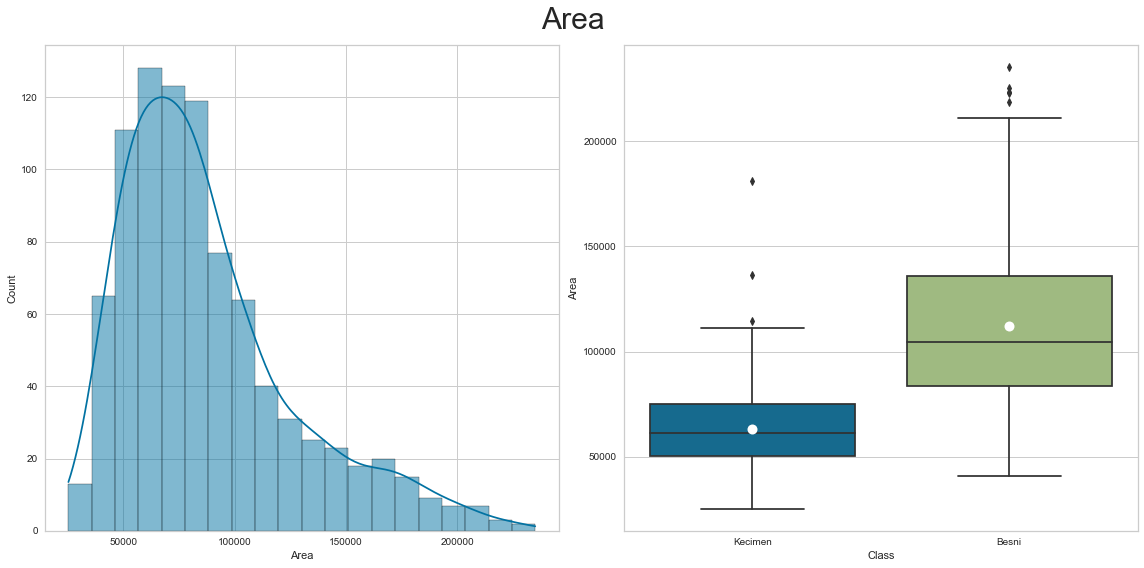

In [7]:
fig, ax = plt.subplots(1,2, figsize = (16,8))
sns.histplot(df["Area"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            y="Area",
            x = "Class",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
fig.suptitle("Area", fontsize = 30)
plt.tight_layout()

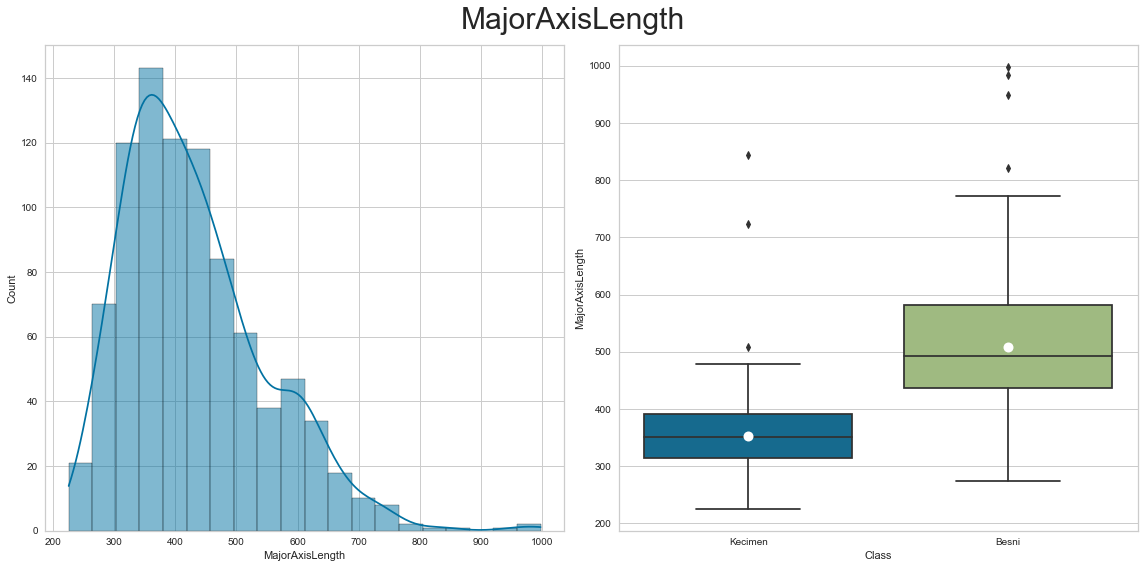

In [8]:
fig, ax = plt.subplots(1,2, figsize = (16,8))
sns.histplot(df["MajorAxisLength"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            y="MajorAxisLength",
            x = "Class",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
fig.suptitle("MajorAxisLength", fontsize = 30)
plt.tight_layout()

In [9]:
df[(df["Class"] == "Kecimen") & (df["MajorAxisLength"] > 600)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
85,180898,843.956653,323.190569,0.92377,221396,0.454189,2253.557,Kecimen
290,136340,722.853917,311.341355,0.90249,176818,0.529774,2098.263,Kecimen


In [10]:
df.drop(index=df[(df["Class"] == "Kecimen") & (df["MajorAxisLength"] > 600)].index, inplace=True)

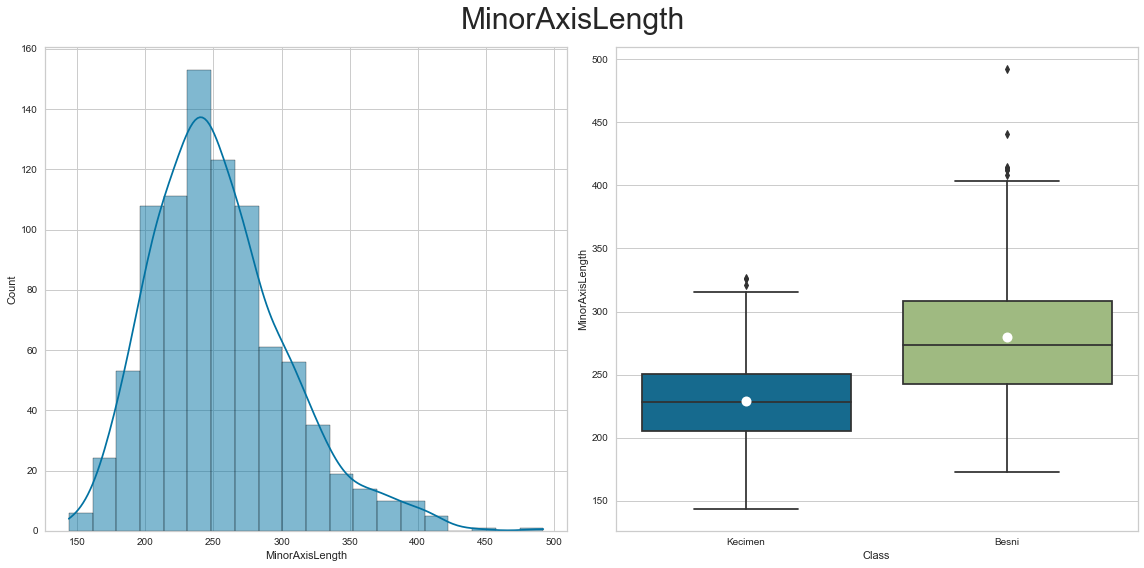

In [11]:
fig, ax = plt.subplots(1,2, figsize = (16,8))
sns.histplot(df["MinorAxisLength"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            y="MinorAxisLength",
            x = "Class",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
fig.suptitle("MinorAxisLength", fontsize = 30)
plt.tight_layout()

In [12]:
df[(df["Class"] == "Besni") & (df["MinorAxisLength"] > 425)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
552,204864,596.639802,440.497127,0.674476,209457,0.751009,1726.246,Besni
880,218459,571.289203,492.275279,0.507432,228259,0.731974,1947.460,Besni


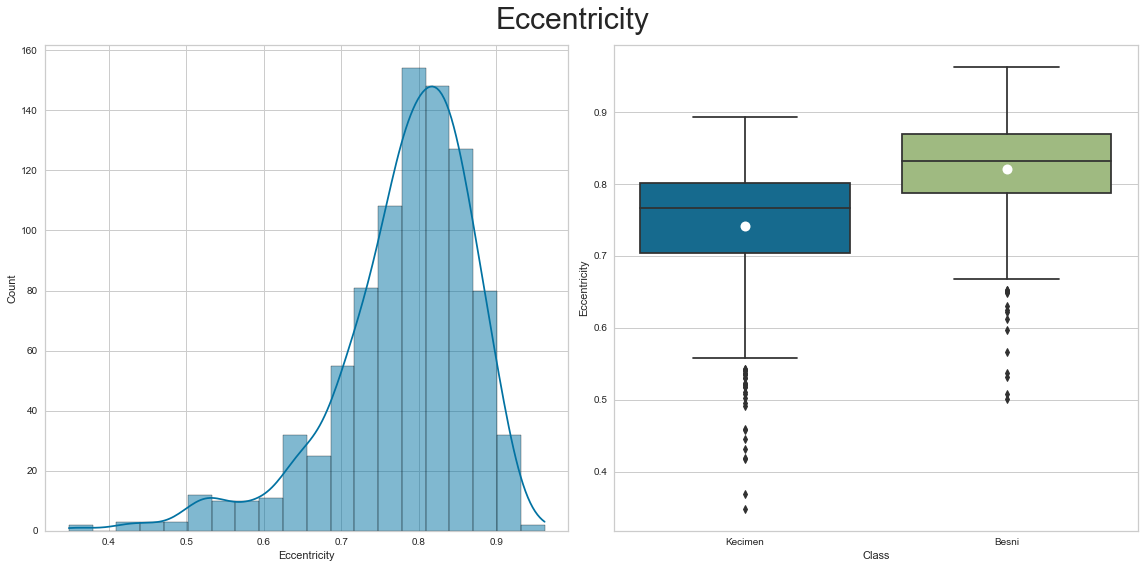

In [13]:
fig, ax = plt.subplots(1,2, figsize = (16,8))
sns.histplot(df["Eccentricity"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            y="Eccentricity",
            x = "Class",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
fig.suptitle("Eccentricity", fontsize = 30)
plt.tight_layout()

In [14]:
df[(df["Class"] == "Besni") & (df["Eccentricity"] < 0.65)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
458,124579,439.960503,371.026214,0.537416,128307,0.698250,1373.537,Besni
483,92188,374.720164,324.302562,0.500991,95920,0.747600,1190.813,Besni
490,171256,531.373205,412.382817,0.630647,174277,0.701915,1559.214,Besni
500,143386,469.276508,397.310190,0.532160,146328,0.750260,1422.014,Besni
558,87857,380.776487,300.908648,0.612784,90968,0.728499,1144.344,Besni
596,63491,326.632882,248.322449,0.649631,64892,0.734357,950.297,Besni
639,61123,329.330220,257.268093,0.624299,70556,0.723264,1128.077,Besni
688,57999,311.022470,243.476121,0.622242,61519,0.656335,968.697,Besni
831,48488,275.337717,226.802199,0.566991,50103,0.669594,859.326,Besni
849,102722,416.898937,317.542803,0.647956,107169,0.724420,1261.988,Besni


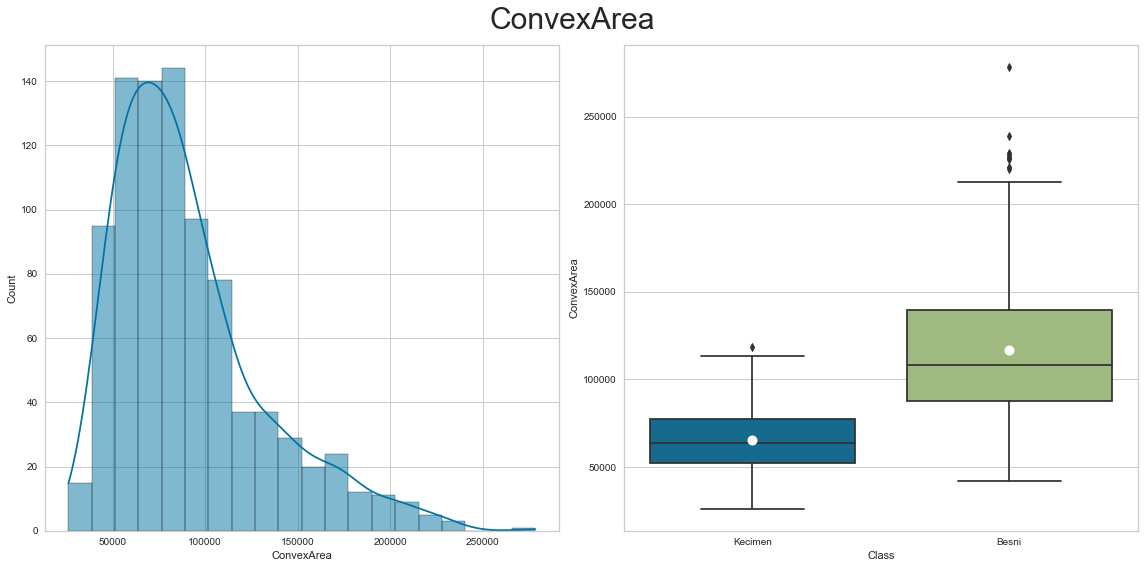

In [15]:
fig, ax = plt.subplots(1,2, figsize = (16,8))
sns.histplot(df["ConvexArea"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            y="ConvexArea",
            x = "Class",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
fig.suptitle("ConvexArea", fontsize = 30)
plt.tight_layout()

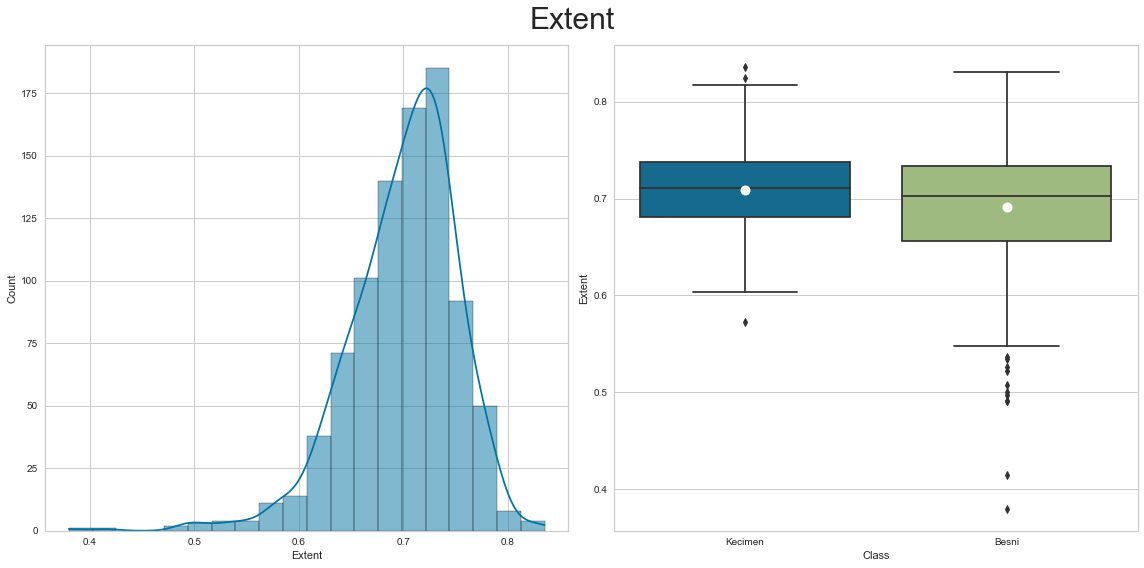

In [16]:
fig, ax = plt.subplots(1,2, figsize = (16,8))
sns.histplot(df["Extent"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            y="Extent",
            x = "Class",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
fig.suptitle("Extent", fontsize = 30)
plt.tight_layout()

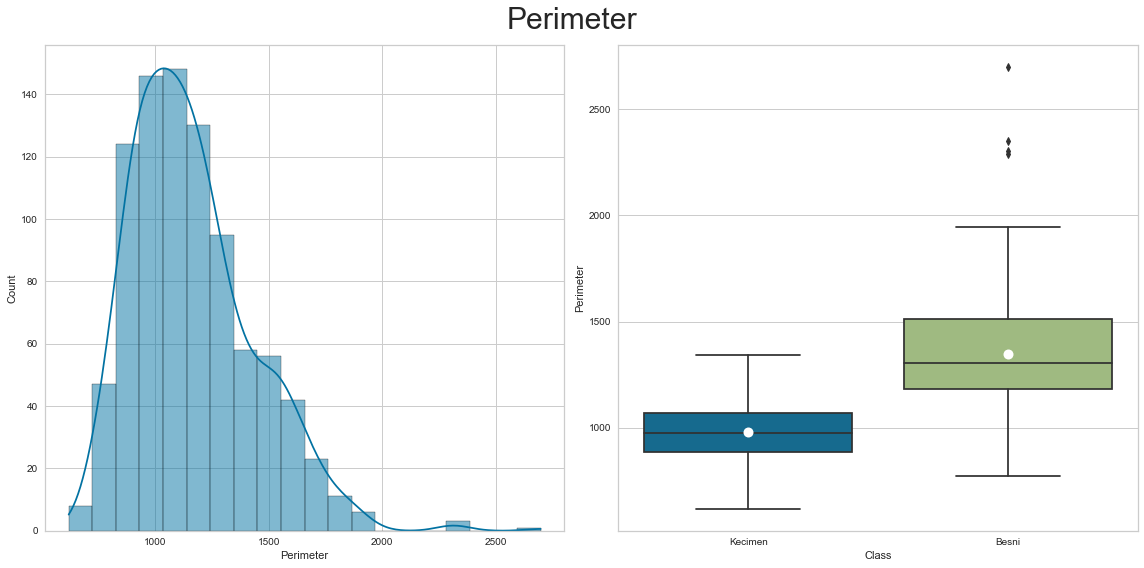

In [17]:
fig, ax = plt.subplots(1,2, figsize = (16,8))
sns.histplot(df["Perimeter"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            y="Perimeter",
            x = "Class",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
fig.suptitle("Perimeter", fontsize = 30)
plt.tight_layout()

In [18]:
df["Class"].replace({"Besni":1,"Kecimen":0}, inplace=True)

In [19]:
#sns.pairplot(df, kind="reg")

In [20]:
df.corr()["Class"]

Area               0.633025
MajorAxisLength    0.688047
MinorAxisLength    0.507366
Eccentricity       0.443297
ConvexArea         0.637382
Extent            -0.166433
Perimeter          0.685498
Class              1.000000
Name: Class, dtype: float64

In [21]:
df_corr = df.corr()
for i in df_corr.columns:
    result = df_corr[i][(abs(df_corr[i])>0.9) & (abs(df_corr[i])!=1)]
    if len(result.index)>0:
        for j in result.index:
            print(f"Corelation with {i} and {j} is higher than 0.9")

Corelation with Area and MajorAxisLength is higher than 0.9
Corelation with Area and MinorAxisLength is higher than 0.9
Corelation with Area and ConvexArea is higher than 0.9
Corelation with Area and Perimeter is higher than 0.9
Corelation with MajorAxisLength and Area is higher than 0.9
Corelation with MajorAxisLength and ConvexArea is higher than 0.9
Corelation with MajorAxisLength and Perimeter is higher than 0.9
Corelation with MinorAxisLength and Area is higher than 0.9
Corelation with ConvexArea and Area is higher than 0.9
Corelation with ConvexArea and MajorAxisLength is higher than 0.9
Corelation with ConvexArea and Perimeter is higher than 0.9
Corelation with Perimeter and Area is higher than 0.9
Corelation with Perimeter and MajorAxisLength is higher than 0.9
Corelation with Perimeter and ConvexArea is higher than 0.9


<AxesSubplot:>

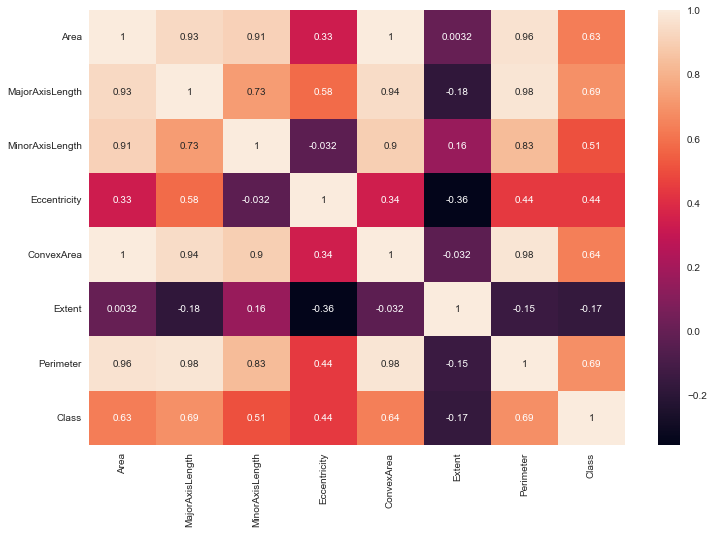

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

## Train | Test Split and Scaling

* for train_test_split use fallowing arguments:
    * train_size: 0.2
    * stratify: True
    * random_state: 10    
* Use StandardScaler to scale the data.

In [23]:
X = df.drop(columns="Class")
y = df["Class"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10) 

# Logistic Regression

* Train the model using the training set with the default parameters.

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()

In [28]:
from sklearn.pipeline import Pipeline
operations = [("scaler", scaler),("logistic",model_logistic)]
pipe_logistic = Pipeline(operations)

In [29]:
pipe_logistic.fit(X_train,y_train)

y_pred = pipe_logistic.predict(X_test)
y_pred_proba = pipe_logistic.predict_proba(X_test)

df_logistic = pd.concat([X_test,y_test], axis=1)
df_logistic["y_pred"] = y_pred
df_logistic["y_pred_proba"] = y_pred_proba[:,1]
df_logistic

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,y_pred,y_pred_proba
144,46742,303.555203,199.445933,0.753861,48077,0.705263,847.792,0,0,0.036305
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680,1,1,0.782800
272,90178,466.249387,250.104302,0.843953,92321,0.752003,1180.478,0,1,0.719834
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182,0,0,0.025369
732,98260,520.103078,245.209759,0.881885,103918,0.576457,1345.687,1,1,0.984882
...,...,...,...,...,...,...,...,...,...,...
806,142239,614.834478,297.735347,0.874928,148078,0.643516,1553.114,1,1,0.998696
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330,0,1,0.773520
561,144084,555.921021,332.123889,0.801921,149076,0.729421,1506.255,1,1,0.989246
113,50545,286.871332,227.159717,0.610713,51771,0.835455,847.664,0,0,0.013124


## Model Performance
*Check the accuracy of the model using the train and test set by given eval_metric function.

In [30]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

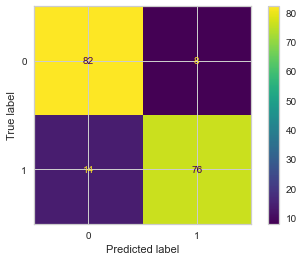

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
plot_confusion_matrix(pipe_logistic, X_test, y_test)

In [29]:
eval_metric(pipe_logistic, X_train, y_train, X_test, y_test)

Test_Set
[[82  8]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        90
           1       0.90      0.84      0.87        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[315  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       358
           1       0.88      0.85      0.86       360

    accuracy                           0.87       718
   macro avg       0.87      0.87      0.87       718
weighted avg       0.87      0.87      0.87       718



### Cross Validate

* Use the cross_val_score function to evaluate the model using the train set.

In [40]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipe_logistic, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.015625,0.015646,0.864865,0.888889,0.876712,0.875000
2,0.015608,0.000000,0.937500,0.833333,0.882353,0.888889
3,0.015623,0.000000,0.769231,0.833333,0.800000,0.791667
4,0.031249,0.000000,0.857143,0.833333,0.845070,0.847222
5,0.015650,0.015599,0.935484,0.805556,0.865672,0.875000
6,0.015623,0.015629,0.848485,0.777778,0.811594,0.819444
7,0.015642,0.000000,0.971429,0.944444,0.957746,0.958333
8,0.015604,0.015624,0.882353,0.833333,0.857143,0.861111
9,0.015620,0.015623,0.864865,0.888889,0.876712,0.873239
10,0.015650,0.015602,0.885714,0.861111,0.873239,0.873239


In [31]:
df_scores.mean()[2:]

test_precision    0.881707
test_recall       0.850000
test_f1           0.864624
test_accuracy     0.866315
dtype: float64

### GridSearchCV
* Use the GridSearchCV function to find the best parameters for the model.

In [32]:
pipe_logistic.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [33]:
param_grid = {"logistic__l1_ratio" : [0.1,0.3,0.5,0.7,0.9,0.95,1],
         "logistic__C" : np.linspace(1,10,10),
         "logistic__max_iter" : [1000],
          "logistic__n_jobs" : [-1],
         "logistic__penalty" : ['l1', 'l2', 'elasticnet'],
            "logistic__solver" : ["lbfgs", "liblinear", "sag", "saga"],
             "logistic__class_weight" : ["balanced", None]}

In [34]:
grid_model = GridSearchCV(pipe_logistic, param_grid = param_grid, cv=10)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'logistic__class_weight': ['balanced', None],
                         'logistic__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.95,
                                                1],
                         'logistic__max_iter': [1000], 'logistic__n_jobs': [-1],
                         'logistic__penalty': ['l1', 'l2', 'elasticnet'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']})

In [35]:
grid_model.best_params_

{'logistic__C': 6.0,
 'logistic__class_weight': 'balanced',
 'logistic__l1_ratio': 0.1,
 'logistic__max_iter': 1000,
 'logistic__n_jobs': -1,
 'logistic__penalty': 'l1',
 'logistic__solver': 'saga'}

In [36]:
grid_model.best_score_

0.8705203442879499

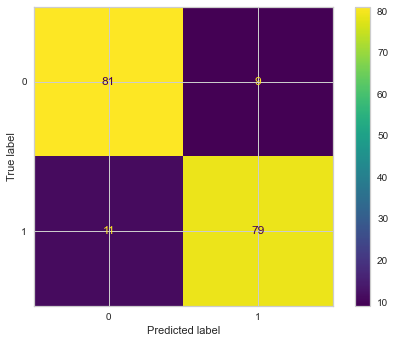

In [37]:
plot_confusion_matrix(grid_model, X_test, y_test)

In [38]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [11 79]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        90
           1       0.90      0.88      0.89        90

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180


Train_Set
[[320  38]
 [ 54 306]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       358
           1       0.89      0.85      0.87       360

    accuracy                           0.87       718
   macro avg       0.87      0.87      0.87       718
weighted avg       0.87      0.87      0.87       718



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

* Use the roc_curve function to calculate the ROC curve and compare logistic regression models with default and tuned parameters. 

In [39]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

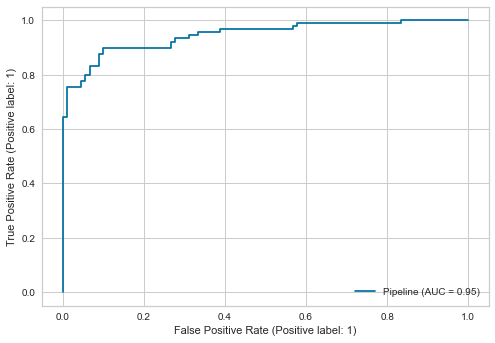

In [40]:
plot_roc_curve(pipe_logistic, X_test, y_test);

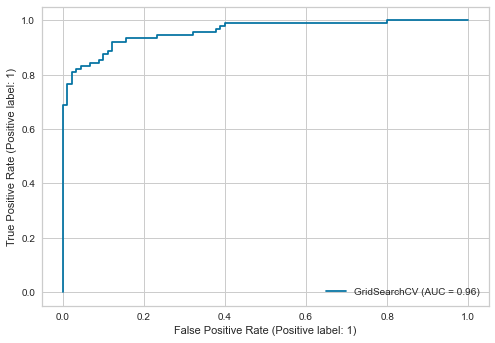

In [41]:
plot_roc_curve(grid_model, X_test, y_test);

In [42]:
y_pred_proba = grid_model.predict_proba(X_train)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9348541278708876

In [43]:

fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)

optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.586500067842569

In [44]:
y_pred_proba = grid_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.9487959117127345

In [45]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.49964183485221764

In [46]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[81  9]
 [11 79]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        90
           1       0.90      0.88      0.89        90

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



## KNN (K-Nearest Neighbors)
* Train the model using the training set with the default parameters.

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

In [48]:
operations = [("scaler",scaler),("knn",model_knn)]
pipe_knn = Pipeline(operations)

pipe_knn.fit(X_train, y_train)

y_pred = pipe_knn.predict(X_test)
y_pred_proba = pipe_knn.predict_proba(X_test)

df_knn = pd.concat([X_test,y_test], axis=1)
df_knn["y_pred"] = y_pred
df_knn["y_pred_proba"] = y_pred_proba[:,1]
df_knn

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,y_pred,y_pred_proba
144,46742,303.555203,199.445933,0.753861,48077,0.705263,847.792,0,0,0.0
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680,1,1,1.0
272,90178,466.249387,250.104302,0.843953,92321,0.752003,1180.478,0,1,0.8
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182,0,0,0.0
732,98260,520.103078,245.209759,0.881885,103918,0.576457,1345.687,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...
806,142239,614.834478,297.735347,0.874928,148078,0.643516,1553.114,1,1,1.0
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330,0,1,1.0
561,144084,555.921021,332.123889,0.801921,149076,0.729421,1506.255,1,1,1.0
113,50545,286.871332,227.159717,0.610713,51771,0.835455,847.664,0,0,0.0


In [49]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
confusion_matrix(y_test, y_pred)

array([[81,  9],
       [16, 74]], dtype=int64)

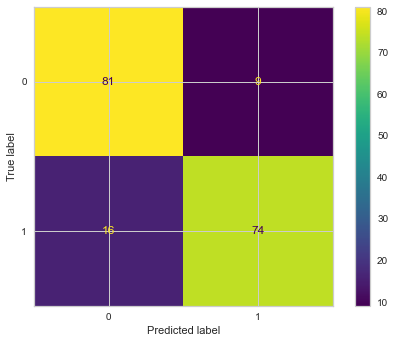

In [50]:
plot_confusion_matrix(pipe_knn, X_test, y_test);

In [51]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[81  9]
 [16 74]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        90
           1       0.89      0.82      0.86        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



### Elbow Method for Choosing Reasonable K Values
* Use the elbow method to find the optimal number of neighbors.

In [56]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
test_error_rates = []


for k in range(1,30):
    pipe_elbow = Pipeline(steps = [("scaler",scaler),("elbow",KNeighborsClassifier(n_neighbors=k))])  # {'n_neighbors': 21, 'p': 2, 'weights': 'uniform'}
    pipe_elbow.fit(X_train,y_train) 
   
    y_pred_test = pipe_elbow.predict(X_test)
    
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

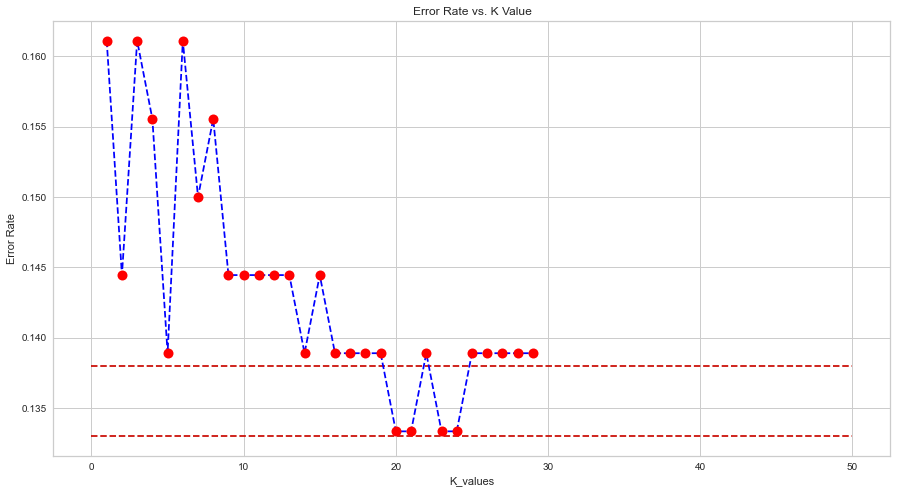

In [76]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.138, xmin = 0, xmax = 50, colors= 'r', linestyles="--")
plt.hlines(y=0.133, xmin = 0, xmax = 50, colors= 'r', linestyles="--")

In [77]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    pipe_elbow = Pipeline(steps = [("scaler",scaler),("elbow",KNeighborsClassifier(n_neighbors=k))])  # {'n_neighbors': 21, 'p': 2, 'weights': 'uniform'}
    pipe_elbow.fit(X_train,y_train) 
   
    y_pred_test = pipe_elbow.predict(X_test)
    y_pred_train = pipe_elbow.predict(X_train)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

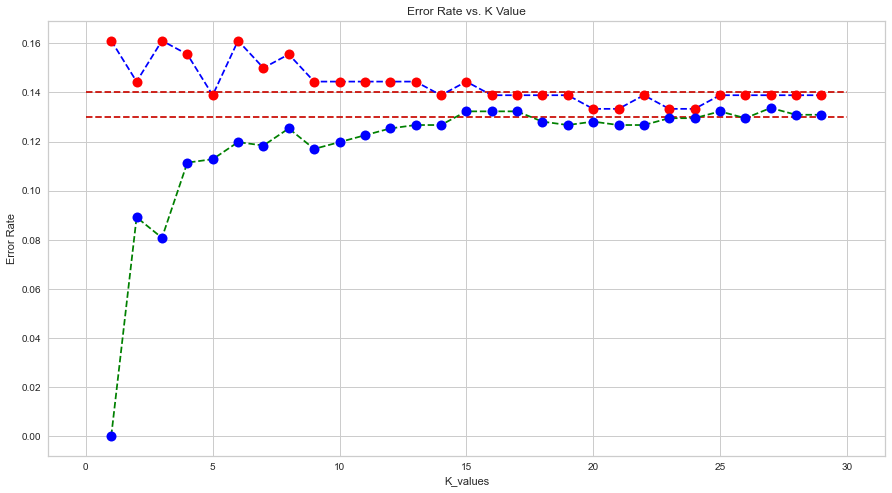

In [79]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.140, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.130, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

### Scores by Various K Values
* Select some k values smaller and bigger than the optimal k value to see how the model performs.

In [80]:
pipe_elbow = Pipeline(steps = [("scaler",scaler),("elbow",KNeighborsClassifier(n_neighbors=5))])
pipe_elbow.fit(X_train,y_train)

eval_metric(pipe_elbow, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [16 74]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        90
           1       0.89      0.82      0.86        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[330  28]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       358
           1       0.92      0.85      0.88       360

    accuracy                           0.89       718
   macro avg       0.89      0.89      0.89       718
weighted avg       0.89      0.89      0.89       718



In [82]:
pipe_elbow = Pipeline(steps = [("scaler",scaler),("elbow",KNeighborsClassifier(n_neighbors=21))])
pipe_elbow.fit(X_train,y_train)

eval_metric(pipe_elbow, X_train, y_train, X_test, y_test)
                    

Test_Set
[[82  8]
 [16 74]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        90
           1       0.90      0.82      0.86        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[325  33]
 [ 58 302]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       358
           1       0.90      0.84      0.87       360

    accuracy                           0.87       718
   macro avg       0.88      0.87      0.87       718
weighted avg       0.88      0.87      0.87       718



### Cross Validate
* Use the cross_val_score function to evaluate the model using the train set. Use optimal k value which you found in the elbow method.

In [83]:
from sklearn.model_selection import cross_val_score, cross_validate

In [86]:
pipe_knn = Pipeline(steps = [("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=5))])

scores = cross_validate(pipe_knn, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.011991,0.012993,0.875000,0.935484,0.805556,0.865672
2,0.009989,0.011988,0.833333,0.875000,0.777778,0.823529
3,0.005995,0.022986,0.833333,0.833333,0.833333,0.833333
4,0.006934,0.011995,0.847222,0.878788,0.805556,0.840580
5,0.005996,0.009993,0.861111,0.964286,0.750000,0.843750
6,0.005997,0.002046,0.819444,0.848485,0.777778,0.811594
7,0.000000,0.015634,0.944444,0.970588,0.916667,0.942857
8,0.000000,0.015637,0.763889,0.756757,0.777778,0.767123
9,0.000000,0.015627,0.873239,0.909091,0.833333,0.869565
10,0.000000,0.015623,0.845070,0.903226,0.777778,0.835821


In [87]:
df_scores.mean()[2:]

test_accuracy     0.849609
test_precision    0.887504
test_recall       0.805556
test_f1           0.843382
dtype: float64

In [88]:
pipe_knn = Pipeline(steps = [("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=21))])

scores = cross_validate(pipe_knn, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.014010,0.013971,0.875000,0.909091,0.833333,0.869565
2,0.009993,0.012995,0.861111,0.933333,0.777778,0.848485
3,0.016013,0.020012,0.805556,0.805556,0.805556,0.805556
4,0.005997,0.007512,0.819444,0.828571,0.805556,0.816901
5,0.000000,0.015646,0.875000,0.965517,0.777778,0.861538
6,0.000000,0.015622,0.819444,0.870968,0.750000,0.805970
7,0.000000,0.015626,0.944444,0.944444,0.944444,0.944444
8,0.000000,0.015602,0.833333,0.852941,0.805556,0.828571
9,0.000000,0.015624,0.887324,0.888889,0.888889,0.888889
10,0.000000,0.015623,0.887324,0.937500,0.833333,0.882353


In [89]:
df_scores.mean()[2:]

test_accuracy     0.860798
test_precision    0.893681
test_recall       0.822222
test_f1           0.855227
dtype: float64


### Gridsearch Method for Choosing Reasonable K Values
* Use the GridSearchCV function to find the best parameters for the model. this method is brute force method to find the best parameters, and it takes a long time to run for KNN. You will get different k values because of you will use different parameters, and also gridsearch method tries to find minimum error. Sometimes it get larger k values for optimal but for  sake of reduce complexity we use the elbow method to find the optimal k value.

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
pipe_knn.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=21))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=21),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 21,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [92]:
param_grid = { "knn__p" : [1,2],
              "knn__n_neighbors" : range(1,30),
              "knn__weights" : ['uniform', 'distance']
    }

In [93]:
pipe_grid = GridSearchCV(pipe_knn, param_grid, cv=10, scoring= 'f1')

pipe_grid.fit(X_train,y_train)

pipe_grid.best_params_

{'knn__n_neighbors': 28, 'knn__p': 2, 'knn__weights': 'uniform'}

In [94]:
eval_metric(pipe_grid, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [16 74]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        90
           1       0.89      0.82      0.86        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[327  31]
 [ 63 297]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       358
           1       0.91      0.82      0.86       360

    accuracy                           0.87       718
   macro avg       0.87      0.87      0.87       718
weighted avg       0.87      0.87      0.87       718



### Evaluating ROC Curves and AUC
*Use the roc_curve function to calculate the ROC curve and compare KNN models with default and tuned parameters.

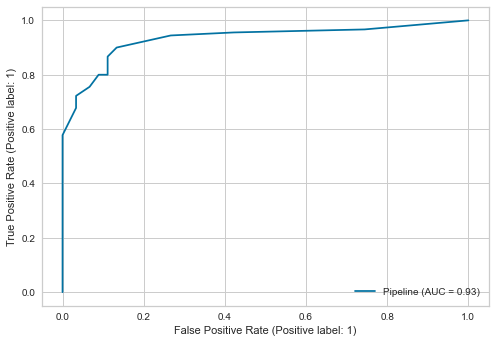

In [95]:
pipe_knn = Pipeline(steps = [("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=12))])
pipe_knn.fit(X_train, y_train)
plot_roc_curve(pipe_knn, X_test, y_test);

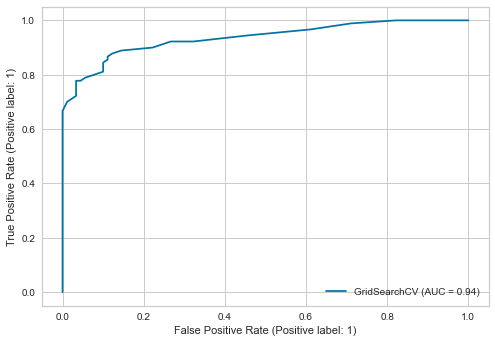

In [96]:
plot_roc_curve(pipe_grid,X_test, y_test);

## SVM

In [97]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model_svc = SVC()
operations = [("scaler", StandardScaler()), ("SVC", model_svc)]
pipe_svc = Pipeline(steps=operations)
pipe_svc.fit(X_train, y_train)
eval_metric(pipe_svc, X_train, y_train, X_test, y_test)

Test_Set
[[82  8]
 [15 75]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        90
           1       0.90      0.83      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[327  31]
 [ 59 301]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       358
           1       0.91      0.84      0.87       360

    accuracy                           0.87       718
   macro avg       0.88      0.87      0.87       718
weighted avg       0.88      0.87      0.87       718



### Cross Validation

In [98]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipe_svc, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.871929
test_precision    0.905454
test_recall       0.833333
test_f1           0.866942
dtype: float64

### Grid Search

In [101]:
pipe_svc.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('SVC', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [102]:
from sklearn.model_selection import GridSearchCV

#C arttıkça overfit olma ihtimali artıyor

param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1, 0.3, 0.5],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                "SVC__probability" : [True]}

In [103]:
#Balanced olması recall artırmak için, özellikle imbalanced datalarda kullanılıyor
svm_model_grid = GridSearchCV(pipe_svc, param_grid, scoring="f1", cv=10)

svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC())]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1, 0.3, 0.5],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'SVC__probability': [True]},
             scoring='f1')

In [104]:
svm_model_grid.best_params_

{'SVC__C': 0.1,
 'SVC__gamma': 0.2,
 'SVC__kernel': 'sigmoid',
 'SVC__probability': True}

In [105]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [15 75]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        90
           1       0.89      0.83      0.86        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[313  45]
 [ 52 308]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       358
           1       0.87      0.86      0.86       360

    accuracy                           0.86       718
   macro avg       0.87      0.86      0.86       718
weighted avg       0.87      0.86      0.86       718



In [107]:
y_pred_proba = svm_model_grid.predict_proba(X_test)
y_pred_proba

array([[9.72595028e-01, 2.74049724e-02],
       [3.18275145e-01, 6.81724855e-01],
       [2.12754909e-01, 7.87245091e-01],
       [9.82883687e-01, 1.71163127e-02],
       [4.89808177e-02, 9.51019182e-01],
       [9.44620324e-01, 5.53796764e-02],
       [1.59088848e-02, 9.84091115e-01],
       [7.12324190e-01, 2.87675810e-01],
       [9.48932772e-01, 5.10672283e-02],
       [9.47968752e-01, 5.20312478e-02],
       [4.75429763e-01, 5.24570237e-01],
       [9.79703235e-01, 2.02967653e-02],
       [9.75218641e-01, 2.47813587e-02],
       [9.24367147e-01, 7.56328534e-02],
       [6.37141960e-07, 9.99999363e-01],
       [9.42629184e-01, 5.73708159e-02],
       [2.12232872e-06, 9.99997878e-01],
       [8.41885986e-01, 1.58114014e-01],
       [8.96208245e-01, 1.03791755e-01],
       [4.19838607e-03, 9.95801614e-01],
       [9.72076304e-01, 2.79236964e-02],
       [9.14672211e-01, 8.53277888e-02],
       [8.74823087e-01, 1.25176913e-01],
       [9.55836117e-01, 4.41638831e-02],
       [9.895027

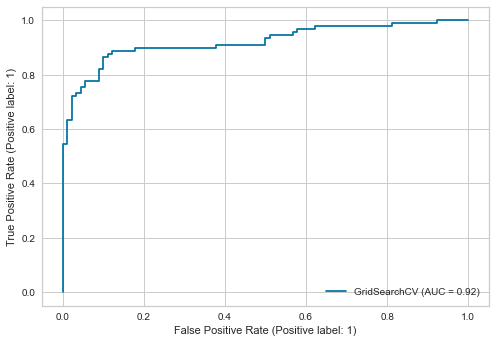

In [108]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
plot_roc_curve(svm_model_grid, X_test, y_test);

In [112]:
y_pred_proba = svm_model_grid.predict_proba(X_train)
roc_auc_score(y_train, y_pred_proba[:,1])

0.917776225946617

In [113]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)

optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6084766088326421

In [114]:
y_pred2 = pd.Series(svm_model_grid.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[82  8]
 [18 72]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        90
           1       0.90      0.80      0.85        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



## Decision Trees

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(X_train, y_train)

eval_metric(model_dt, X_train, y_train, X_test, y_test)

Test_Set
[[74 16]
 [16 74]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        90
           1       0.82      0.82      0.82        90

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180


Train_Set
[[358   0]
 [  0 360]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       358
           1       1.00      1.00      1.00       360

    accuracy                           1.00       718
   macro avg       1.00      1.00      1.00       718
weighted avg       1.00      1.00      1.00       718



In [100]:
path = model_dt.cost_complexity_pruning_path(X_train,y_train)
path = path.ccp_alphas
path

array([0.        , 0.00092851, 0.00116063, 0.00121866, 0.00121866,
       0.00123801, 0.00129327, 0.00129327, 0.00129991, 0.00130571,
       0.00132312, 0.00132342, 0.00132644, 0.00134923, 0.00137937,
       0.00138609, 0.00139276, 0.00139276, 0.0015055 , 0.00163472,
       0.00165804, 0.00167131, 0.00185701, 0.00185701, 0.00185701,
       0.00185701, 0.00185701, 0.00187887, 0.00200833, 0.00208914,
       0.00227484, 0.00230419, 0.00232126, 0.00249467, 0.00250696,
       0.00259981, 0.0027971 , 0.00306534, 0.00335478, 0.0040662 ,
       0.00408761, 0.00417827, 0.00419782, 0.00423692, 0.00846016,
       0.01213786, 0.01675754, 0.26835153])

In [101]:
accuracy_cv =[]
for alpha in path:
    scores = cross_validate(DecisionTreeClassifier(ccp_alpha=alpha), X_train, y_train, scoring = ['accuracy'], cv = 10)
    accuracy_cv.append(scores["test_accuracy"].mean())
  
result = pd.DataFrame(list(path), columns=['alpha'])
result['accuracy_CV']=accuracy_cv

result.head()

,alpha,accuracy_CV
0,0.000000,0.813517
1,0.000929,0.803736
2,0.001161,0.806534
3,0.001219,0.812089
4,0.001219,0.805086


In [103]:
result.iloc[np.argmax(result["accuracy_CV"]),:]

alpha          0.004237
accuracy_CV    0.852406
Name: 43, dtype: float64

In [104]:
best_alpha = result.iloc[np.argmax(result["accuracy_CV"]),:]["alpha"]

In [105]:
model_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
model_dt.fit(X_train, y_train)

eval_metric(model_dt, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [16 74]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        90
           1       0.89      0.82      0.86        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[316  42]
 [ 46 314]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       358
           1       0.88      0.87      0.88       360

    accuracy                           0.88       718
   macro avg       0.88      0.88      0.88       718
weighted avg       0.88      0.88      0.88       718



### Cross Validation

In [106]:
scores = cross_validate(DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha), X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.851017
test_precision    0.875390
test_recall       0.822222
test_f1           0.846537
dtype: float64

### Dropping Most Important Feature 

In [107]:
model_dt.feature_importances_

array([0.        , 0.93262172, 0.        , 0.02767406, 0.03970422,
       0.        , 0.        ])

In [108]:
X_train.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter'],
      dtype='object')

In [109]:
df_feature = pd.DataFrame(model_dt.feature_importances_, index=X_train.columns, 
                          columns=["Feature_Importance"]).sort_values("Feature_Importance", ascending=False)
df_feature

,Feature_Importance
MajorAxisLength,0.932622
ConvexArea,0.039704
Eccentricity,0.027674
Area,0.000000
MinorAxisLength,0.000000
Extent,0.000000
Perimeter,0.000000


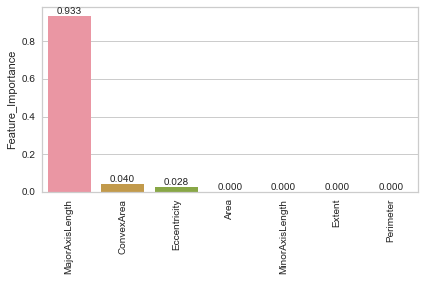

In [110]:
ax = sns.barplot(x = df_feature.index, y = 'Feature_Importance', data = df_feature)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.tight_layout()

In [111]:
X2 = X.drop(columns = ["MajorAxisLength"]) 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=10)

model_dt2 = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)

model_dt2.fit(X_train2, y_train2)

eval_metric(model_dt2, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[81 15]
 [ 9 75]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        96
           1       0.83      0.89      0.86        84

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[295  57]
 [ 33 333]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       352
           1       0.85      0.91      0.88       366

    accuracy                           0.87       718
   macro avg       0.88      0.87      0.87       718
weighted avg       0.88      0.87      0.87       718



In [112]:
path = model_dt2.cost_complexity_pruning_path(X_train2,y_train2)
path = path.ccp_alphas
path

array([0.        , 0.00113953, 0.00119379, 0.00130193, 0.00132482,
       0.00133969, 0.00136832, 0.00139232, 0.00157132, 0.00168015,
       0.00202583, 0.00208914, 0.00215944, 0.00216651, 0.00222841,
       0.00222841, 0.00222841, 0.00243733, 0.0024925 , 0.00249333,
       0.00251595, 0.00263841, 0.0026589 , 0.00268518, 0.00285247,
       0.00318674, 0.00392073, 0.00579043, 0.00868067, 0.01446116,
       0.02281902, 0.26432022])

In [113]:
accuracy_cv =[]
for alpha in path:
    scores = cross_validate(DecisionTreeClassifier(ccp_alpha=alpha), X_train2, y_train2, scoring = ['accuracy'], cv = 10)
    accuracy_cv.append(scores["test_accuracy"].mean())
  
result = pd.DataFrame(list(path), columns=['alpha'])
result['accuracy_CV']=accuracy_cv

result.head()

,alpha,accuracy_CV
0,0.000000,0.817488
1,0.001140,0.821733
2,0.001194,0.827210
3,0.001302,0.829969
4,0.001325,0.817469


In [114]:
best_alpha = result.iloc[np.argmax(result["accuracy_CV"]),:]["alpha"]
best_alpha

0.02281901701824894

In [115]:
model_dt2 = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)

model_dt2.fit(X_train2, y_train2)

eval_metric(model_dt2, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[84 12]
 [12 72]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        96
           1       0.86      0.86      0.86        84

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[307  45]
 [ 53 313]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       352
           1       0.87      0.86      0.86       366

    accuracy                           0.86       718
   macro avg       0.86      0.86      0.86       718
weighted avg       0.86      0.86      0.86       718



In [116]:
scores = cross_validate(DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha), X_train2, y_train2, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.863459
test_precision    0.876252
test_recall       0.855480
test_f1           0.864702
dtype: float64

In [147]:
model_dt2.feature_importances_

array([0.065728  , 0.04495933, 0.09350152, 0.04600592, 0.09096853,
       0.6588367 ])

### Grid Search

In [117]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [118]:
params = {"criterion" : ["gini", "entropy"],
         "splitter" : ["best", "random"],
          "max_features":[None, "auto", "log2", 2, 3,4, 5],
        "max_depth": [None, 2, 3, 4, 5],
        "min_samples_leaf": [1, 2, 3, 4],
        "min_samples_split": [ 3, 5, 6, 7,8]}

In [119]:
grid_dt = GridSearchCV(DecisionTreeClassifier(ccp_alpha=best_alpha), param_grid=params, scoring="f1", cv=10, n_jobs=-1)
grid_dt.fit(X_train2, y_train2)



GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(ccp_alpha=0.02281901701824894),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [120]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [121]:
eval_metric(grid_dt, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[82 14]
 [ 9 75]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        96
           1       0.84      0.89      0.87        84

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[307  45]
 [ 46 320]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       352
           1       0.88      0.87      0.88       366

    accuracy                           0.87       718
   macro avg       0.87      0.87      0.87       718
weighted avg       0.87      0.87      0.87       718



In [122]:
model_dt3 = DecisionTreeClassifier(criterion= 'gini', max_depth = 2, max_features=None,
                                   min_samples_leaf=1, min_samples_split=3, splitter="best")
model_dt3.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=2, min_samples_split=3)

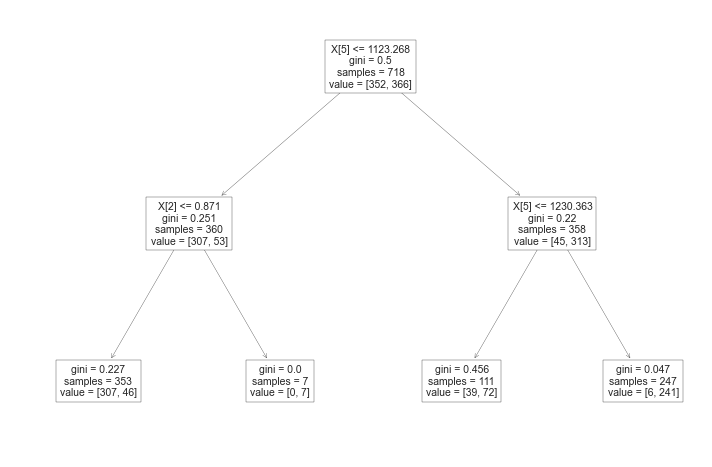

In [123]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8), dpi=75)
plot_tree(model_dt3, fontsize=10);

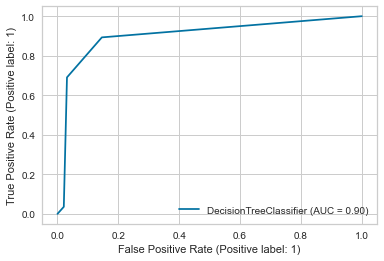

In [124]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
plot_roc_curve(model_dt3, X_test2, y_test2);

# Conclusion 
* Write a short summary of your findings, and decide which model you will use and why.

Logistic Regression = Accuracy - 0.89 , F1 - 0.89 , AUC - 0.96 (Grid-Search)
                    
KNN = Accuracy - 0.86 , F1 - 0.86, AUC - 0.94 (Grid-Search)
    
SVM = Accuracy - 0.87 , F1 - 0.86, AUC - 0.92 (Grid-Search)

DecisionTree = 0.87 , F1 - 0.87, AUC - 0.90 (Grid-Search)

All of them is near to each other. So we choose logistic regression